Here is the introduction to h5py file: http://docs.h5py.org/en/stable/quick.html

In [12]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
#RUN THIS CELL
import h5py as h5py
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [8]:
f= h5py.File('Data1.h5','r')
# h5py.File acts like a Python dictionary, thus we can check the keys
print(list(f.keys()))

['cat', 'img', 'img_nonoise', 'img_withnoise', 'label', 'psf_r', 'sigma', 'snr']


In [10]:
image = f['img'][:]
print('image shape:', image.shape)
cat = f['cat'][:] 
print('cat shape:', cat.shape)
label = f['label'][:]   # this gives the set of parameters that characterize the galaxy 
print('label shape:', label.shape)
snr = f['snr'][:]
print('snr shape:', snr.shape)
sigma = f['sigma'][:]
print('sigma shape:', sigma.shape)
image_nonoise = f['img_nonoise'][:]
print('image_nonoise shape:', image_nonoise.shape)
image_withnoise = f['img_withnoise'][:]
print('image_withnoiser shape:', image_withnoise.shape)
psf_r = f['psf_r'][:]
print('psf_r shape:', psf_r.shape)
f.close()

image shape: (18779, 64, 64)
cat shape: (18779, 6, 64, 64)
label shape: (18779, 5)
snr shape: (18779,)
sigma shape: (18779,)
image_nonoise shape: (18779, 64, 64)
image_withnoiser shape: (18779, 64, 64)
psf_r shape: (20000,)


In [55]:
num_of_img = 3
indices = np.random.randint(image.shape[0], size=num_of_img)
print('Random indices:',indices)

Random indices: [  714   922 15572]


There are 3 images.
Image(index:714) label: [0.35508637 3.14939962 0.17921469 0.21522264 0.02928864]
Image(index:922) label: [ 0.44522109  5.67508215  0.1151183   0.08689272 -0.40381703]
Image(index:15572) label: [ 2.41389033  1.47394061  0.49725152  0.192924   -0.2273364 ]


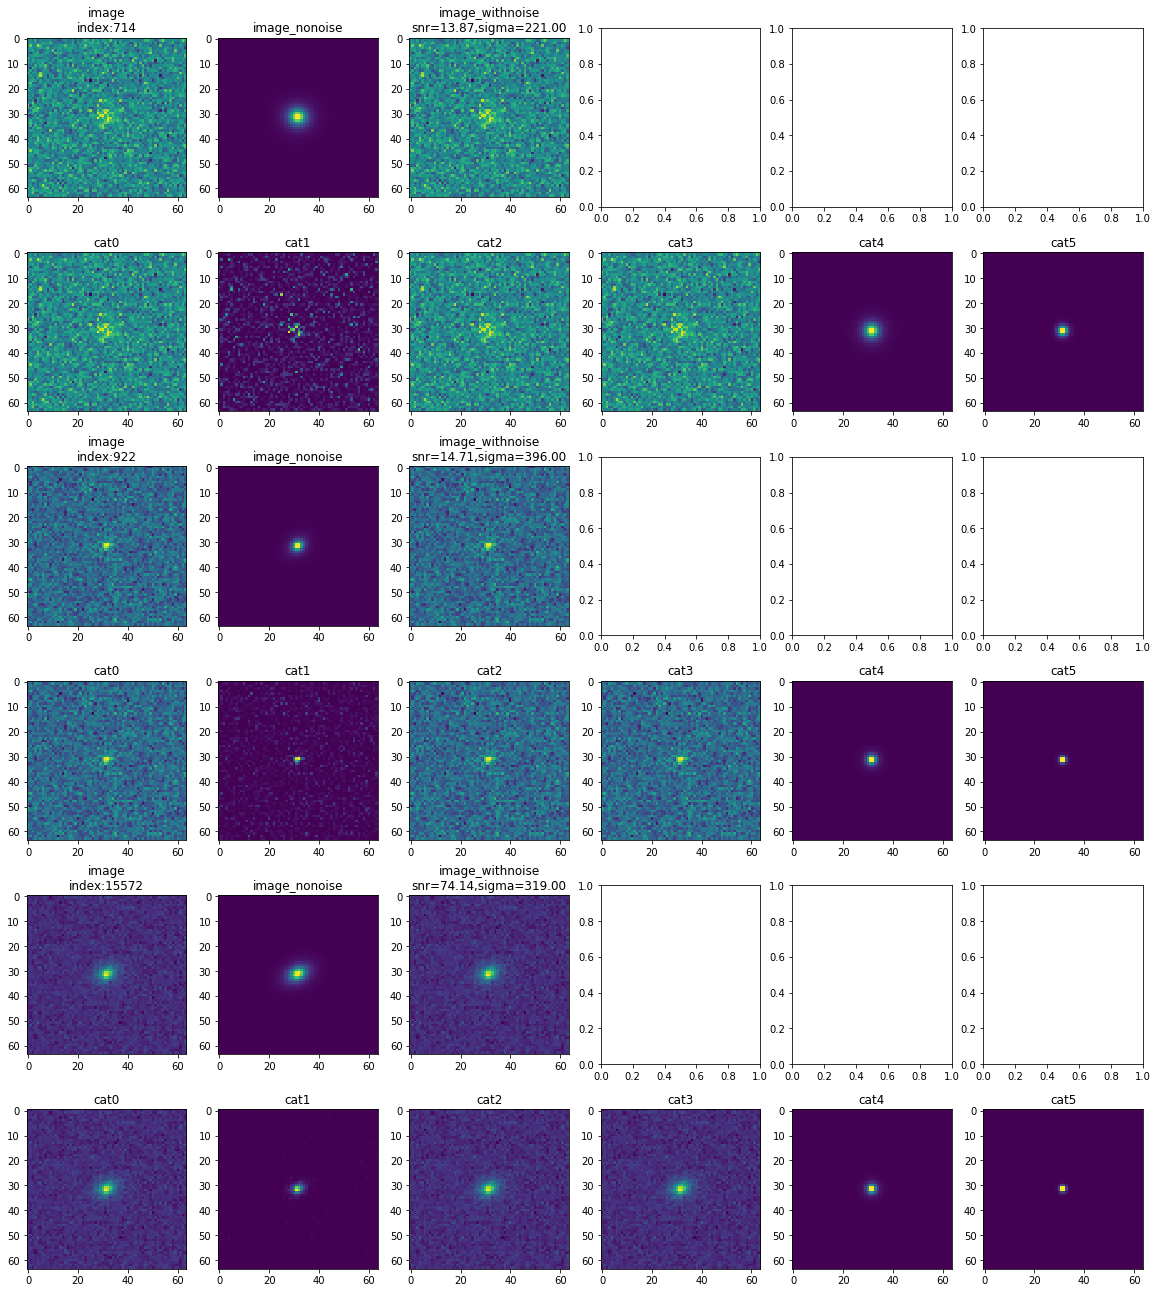

In [71]:
# Visualize Images
print('There are {} images.'.format(num_of_img))
fig, axs = plt.subplots(num_of_img*2, 6, figsize=(20,23))
i = 0 
for ind in indices:
    print('Image(index:{}) label:'.format(ind),label[ind])
     
    axs[i][0].imshow(image[ind])
    axs[i][0].set_title('image\nindex:{}'.format(ind)) 
    
    axs[i][1].imshow(image_nonoise[ind])
    axs[i][1].set_title('image_nonoise')
    
    axs[i][2].imshow(image_withnoise[ind])
    axs[i][2].set_title('image_withnoise\nsnr={:.2f},sigma={:.2f}'.format(snr[ind],sigma[ind]))
        
    axs[i+1][0].imshow(cat[ind][0])
    axs[i+1][0].set_title('cat0')
    
    axs[i+1][1].imshow(cat[ind][1])
    axs[i+1][1].set_title('cat1')
    
    axs[i+1][2].imshow(cat[ind][2])
    axs[i+1][2].set_title('cat2')
    
    axs[i+1][3].imshow(cat[ind][3])
    axs[i+1][3].set_title('cat3')
    
    axs[i+1][4].imshow(cat[ind][4])
    axs[i+1][4].set_title('cat4')
    
    axs[i+1][5].imshow(cat[ind][5])
    axs[i+1][5].set_title('cat5')
    
    i+=2
plt.show(block=False)